# Background
이전 연구에서 첫 매매 승률이 37.5%(3/8)라는 것을 알게 되었다.  
가장 빠른 해결책은 기존과 같은 방법으로 첫 매매를 하지 않는 것이다.   
따라서 첫 매매가 이뤄지는 시간대를 알아내고 해당 시간대에는 매매하지 않는다.  
유튜브 : https://youtu.be/90__UduV4us

# Import

In [120]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load

In [121]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,특징주,SEN,강세 토픽
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,NaN,NaN,NaN
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,NaN,NaN,NaN
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,NaN,NaN,NaN
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,NaN,NaN,NaN
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,NaN,NaN,NaN


# Preprocessing

In [122]:
dates = df['주문일자'].unique()
dates

array(['2022-03-29', '2022-03-31', '2022-03-30', '2022-04-04',
       '2022-04-01', '2022-04-06', '2022-04-05', '2022-04-07'],
      dtype=object)

In [123]:
list = []

for date in dates:
    frame = df[df['주문일자'] == date]
    frame = frame.sort_values('체결시간')
    frame = frame.reset_index(drop=True)
    
    time = frame.iloc[0]['체결시간'][:5]
    profit = frame.iloc[0]['수익률']
    
    list.append([time, profit])

In [124]:
df = pd.DataFrame(list, columns=['time','profit'])
df = df.sort_values('time')
df = df.reset_index(drop=True)
df

,time,profit
0,09:06,-2.43
1,09:06,-0.51
2,09:07,-4.23
3,09:09,2.87
4,09:11,-0.75
5,09:18,-1.01
6,09:20,0.00
7,09:30,4.95


In [125]:
X = df['time']
y = df['profit']

# Visualization
9시 30분부터는 매매해도 된다.  
우상향하는 직선을 그려볼 수 있는 것으로 보아 양의 상관관계가 있는 걸로 보인다.  

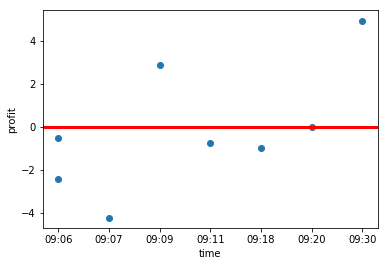

In [126]:
plt.scatter(X, y)
plt.xlabel('time')
plt.ylabel('profit')
plt.axhline(y=0, color='r', linewidth=3)
plt.show()

# Conclusion
아침 9시 30분부터 매매한다.